In [1]:
import sys
import os
import datetime as dt
import math
import matplotlib as plt

sys.path.append("D:\Desktop\Github\Trading_bot")
from Crawler.functions import *

In [2]:
coin_txt = open("../../Crawler/coin.txt","r",encoding = 'utf8')
coin = coin_txt.read()
coin_txt.close()

DB = DB_table(db_name = "../../Crawler/test.db", coin_name = coin)
DB.init_db()

df = DB.get_all()
df.set_index('Timestamp', inplace=True)
print(df)

                         Open      High       Low     Close        Volume
Timestamp                                                                
2017-08-17 12:00:00   4261.48   4313.62   4261.32   4308.83     47.181009
2017-08-17 13:00:00   4308.83   4328.69   4291.37   4315.32     23.234916
2017-08-17 14:00:00   4330.29   4345.45   4309.37   4324.35      7.229691
2017-08-17 15:00:00   4316.62   4349.99   4287.41   4349.99      4.443249
2017-08-17 16:00:00   4333.32   4377.85   4333.32   4360.69      0.972807
...                       ...       ...       ...       ...           ...
2022-10-13 19:00:00  18689.44  18831.07  18658.35  18753.20  13934.924310
2022-10-13 20:00:00  18754.09  18777.72  18742.25  18756.26    919.259730
2022-10-13 21:00:00  18385.30  18479.96  18273.00  18438.18  27029.805740
2022-10-13 22:00:00  18430.95  18436.38  18400.00  18432.69   1868.793230
2022-10-13 23:00:00  18415.65  18832.60  18403.65  18751.54  14220.897600

[45077 rows x 5 columns]


<AxesSubplot: xlabel='Timestamp'>

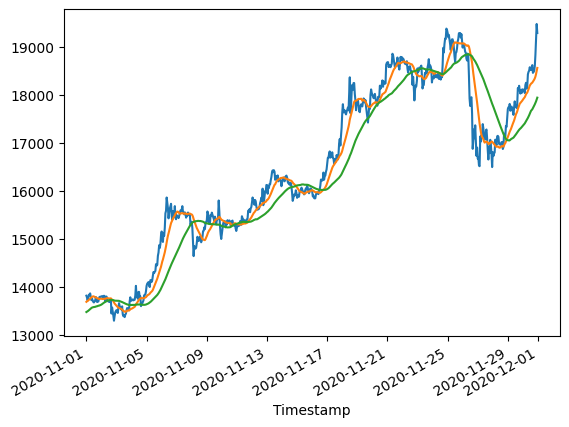

In [3]:
sma1 = df.Close.rolling(20).mean()
sma2 = df.Close.rolling(60).mean()

df.Close['2020-11'].plot()
sma1['2020-11'].plot()
sma2['2020-11'].plot()

In [4]:
condition = sma1 > sma2
print(condition)

Timestamp
2017-08-17 12:00:00    False
2017-08-17 13:00:00    False
2017-08-17 14:00:00    False
2017-08-17 15:00:00    False
2017-08-17 16:00:00    False
                       ...  
2022-10-13 19:00:00    False
2022-10-13 20:00:00    False
2022-10-13 21:00:00    False
2022-10-13 22:00:00    False
2022-10-13 23:00:00    False
Name: Close, Length: 45077, dtype: bool


In [5]:
print(df.Close)
print(df.Close.shift(1))

Timestamp
2017-08-17 12:00:00     4308.83
2017-08-17 13:00:00     4315.32
2017-08-17 14:00:00     4324.35
2017-08-17 15:00:00     4349.99
2017-08-17 16:00:00     4360.69
                         ...   
2022-10-13 19:00:00    18753.20
2022-10-13 20:00:00    18756.26
2022-10-13 21:00:00    18438.18
2022-10-13 22:00:00    18432.69
2022-10-13 23:00:00    18751.54
Name: Close, Length: 45077, dtype: float64
Timestamp
2017-08-17 12:00:00         NaN
2017-08-17 13:00:00     4308.83
2017-08-17 14:00:00     4315.32
2017-08-17 15:00:00     4324.35
2017-08-17 16:00:00     4349.99
                         ...   
2022-10-13 19:00:00    18690.22
2022-10-13 20:00:00    18753.20
2022-10-13 21:00:00    18756.26
2022-10-13 22:00:00    18438.18
2022-10-13 23:00:00    18432.69
Name: Close, Length: 45077, dtype: float64


<AxesSubplot: xlabel='Timestamp'>

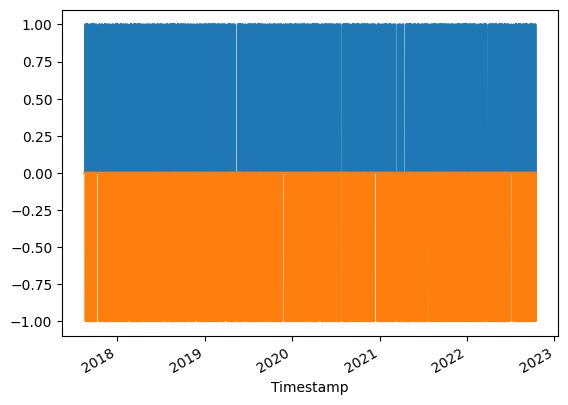

In [6]:
# 做多: 當(今天短週期均線 > 今天長週期均線) 且 (昨天短週期均線 < 昨天長週期均線)
# 做空: 當(今天短週期均線 < 今天長週期均線) 且 (昨天短週期均線 > 昨天長週期均線)
signal_long = (sma1 > sma2) & (sma1.shift() < sma2.shift())
signal_short = (sma1 < sma2) & (sma1.shift() > sma2.shift())

signal_long.astype(int).plot()
(-signal_short.astype(int)).plot()

In [7]:
# combine long and short signal
signal = signal_long.copy()
signal[signal_short] = -1

signal

Timestamp
2017-08-17 12:00:00    False
2017-08-17 13:00:00    False
2017-08-17 14:00:00    False
2017-08-17 15:00:00    False
2017-08-17 16:00:00    False
                       ...  
2022-10-13 19:00:00       -1
2022-10-13 20:00:00    False
2022-10-13 21:00:00    False
2022-10-13 22:00:00    False
2022-10-13 23:00:00    False
Name: Close, Length: 45077, dtype: object

In [3]:
from backtesting import Backtest
from backtesting.lib import SignalStrategy
import pandas as pd

In [9]:
coin_txt = open("../../Crawler/coin.txt","r",encoding = 'utf8')
coin = coin_txt.read()
coin_txt.close()

DB = DB_table(db_name = "../../Crawler/test.db", coin_name = coin)
DB.init_db()

df = DB.get_all()
df.set_index('Timestamp', inplace=True)
print(df)

                         Open      High       Low     Close        Volume
Timestamp                                                                
2017-08-17 12:00:00   4261.48   4313.62   4261.32   4308.83     47.181009
2017-08-17 13:00:00   4308.83   4328.69   4291.37   4315.32     23.234916
2017-08-17 14:00:00   4330.29   4345.45   4309.37   4324.35      7.229691
2017-08-17 15:00:00   4316.62   4349.99   4287.41   4349.99      4.443249
2017-08-17 16:00:00   4333.32   4377.85   4333.32   4360.69      0.972807
...                       ...       ...       ...       ...           ...
2022-10-13 19:00:00  18689.44  18831.07  18658.35  18753.20  13934.924310
2022-10-13 20:00:00  18754.09  18777.72  18742.25  18756.26    919.259730
2022-10-13 21:00:00  18385.30  18479.96  18273.00  18438.18  27029.805740
2022-10-13 22:00:00  18430.95  18436.38  18400.00  18432.69   1868.793230
2022-10-13 23:00:00  18415.65  18832.60  18403.65  18751.54  14220.897600

[45077 rows x 5 columns]


In [15]:
re_df = df["2022-08-13 23:00:00":]
print(re_df)

                         Open      High       Low     Close       Volume
Timestamp                                                               
2022-08-13 23:00:00  24470.51  24600.88  24439.00  24512.66   6752.20796
2022-08-14 00:00:00  24512.66  24563.98  24451.22  24482.84   5523.24411
2022-08-14 01:00:00  24482.78  24578.20  24459.57  24572.21   4590.52992
2022-08-14 02:00:00  24570.63  24593.37  24393.89  24453.92   5864.76524
2022-08-14 03:00:00  24452.10  24497.48  24336.16  24398.56   5173.25706
...                       ...       ...       ...       ...          ...
2022-10-13 19:00:00  18689.44  18831.07  18658.35  18753.20  13934.92431
2022-10-13 20:00:00  18754.09  18777.72  18742.25  18756.26    919.25973
2022-10-13 21:00:00  18385.30  18479.96  18273.00  18438.18  27029.80574
2022-10-13 22:00:00  18430.95  18436.38  18400.00  18432.69   1868.79323
2022-10-13 23:00:00  18415.65  18832.60  18403.65  18751.54  14220.89760

[1465 rows x 5 columns]


In [6]:


class Strategy(SignalStrategy):
    def init(self):
        super().init()
        
        # Precompute the two moving averages
        close = pd.Series(self.data.Close)
        sma1 = close.rolling(20).mean()
        sma2 = close.rolling(60).mean()
        
        # Precompute signal
        signal_long = (sma1 > sma2) & (sma1.shift() < sma2.shift())
        signal_short = (sma1 < sma2) & (sma1.shift() > sma2.shift())
        
        signal = signal_long
        signal[signal_short] = -1
        
        self.set_signal(signal)
        
        
    def next(self):
        super().next()

In [17]:
bt = Backtest(re_df, Strategy)
bt.run()
bt.plot()

C:\Users\Chih\AppData\Local\Temp\ipykernel_26128\282954041.py:1: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(re_df, Strategy)


Row(id='2504', ...)